# Import des librairies

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import scipy.cluster.hierarchy as sch

import warnings

warnings.filterwarnings("ignore")

# Import des fichiers

In [136]:
df_final = pd.read_csv(
    r"C:\Users\melvin.derouk\Desktop\P9\CSV\main_df",
    sep=","
    )

# ACP

In [137]:
#Création d'un nouveau df avec les deux variables selectionnées pour k-means, et standardisées

dfa = df_final[["Population", "PIB (US$)/hab", "Exportations - Quantité(Tonnes)", "Importations - Quantité(Tonnes)", "Distance avec FRA(km)"]]

scdf = StandardScaler()
std_df  = scdf.fit_transform(dfa.astype(float))

std_df

array([[-4.28890229e-02, -5.87592417e-01, -2.27156986e-01,
        -3.21066504e-01, -1.15314117e-01],
       [ 9.28330276e-02, -2.79144561e-01, -8.92206958e-02,
         2.29654176e+00,  8.42942378e-01],
       [-2.61814180e-01, -3.67115640e-01, -2.27156986e-01,
        -2.72492330e-01, -1.13052763e+00],
       [-9.51764936e-03, -3.90186408e-01, -2.27156986e-01,
        -4.66789027e-01, -1.19753480e+00],
       [ 2.60890755e-01,  1.83272926e+00,  1.18723736e+00,
         4.06680055e+00, -1.42683661e+00],
       [-8.53436631e-02, -3.91037349e-01, -2.27156986e-01,
         1.01742185e+00,  1.18940302e-01],
       [-2.80086867e-01,  2.29398893e-01, -2.27156986e-01,
        -4.39803374e-01,  1.69473240e-01],
       [-6.38231963e-02,  5.27333702e-01, -2.05262337e-01,
         3.41914490e+00, -3.43441882e-01],
       [ 7.17729582e-03,  1.87054421e-01,  2.26062254e-01,
        -4.34406244e-01,  1.28059284e+00],
       [-2.61416967e-01, -4.01003357e-01, -2.27156986e-01,
        -2.88683722e-01

In [138]:
def display_scree_plot(pca):
    scree=pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red", marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.xlabel("% d'inertie")
    plt.show(block=False)

In [139]:
print(pca.explained_variance_ratio_)

[0.29902426 0.24209229 0.16917044 0.1591771  0.1305359 ]


In [140]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(5)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,1.503865,30.0,30.0
1,Dim2,1.217540,24.0,54.0
2,Dim3,0.850799,17.0,71.0
3,Dim4,0.800540,16.0,87.0
4,Dim5,0.656496,13.0,100.0


Nb de composantes caculées :  5


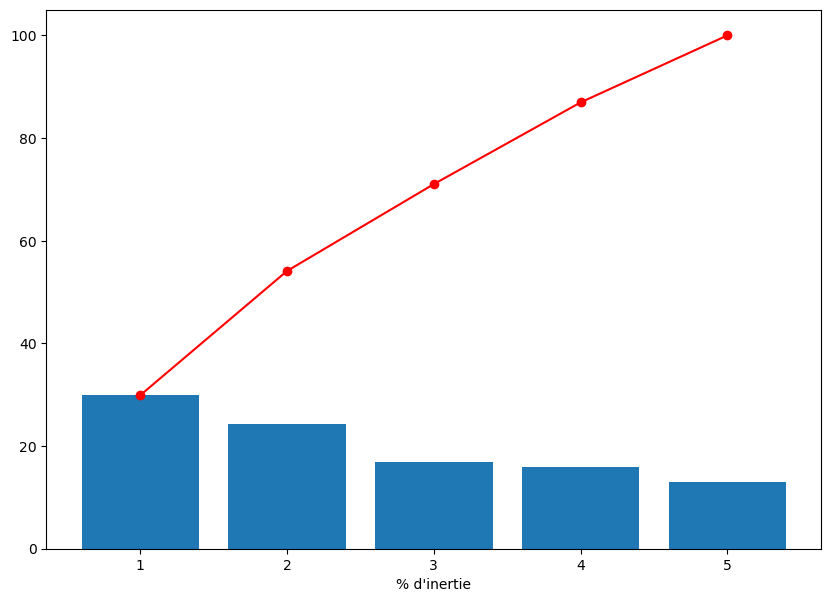

In [141]:
n_comp = 5

pca = PCA(n_components=n_comp)
pca.fit(std_df)
print('Nb de composantes caculées : ', pca.n_components_)

plt.figure(figsize=(10,7))
display_scree_plot(pca)

In [145]:
pca = PCA(n_components=4).fit(std_df)
xk_projected = pca.transform(std_df)

In [147]:
# Transformation en DataFrame pandas
std_pca_df = pd.DataFrame({
    "Dim1" : xk_projected[:,0], 
    "Dim2" : xk_projected[:,1],
    "Dim3" : xk_projected[:,2],
    "Dim4" : xk_projected[:,3],
    "Country" : df_final["Pays"],
    "Continent" : df_final["Continent"]
})

# Résultat (premières lignes)
std_pca_df.head()

,Dim1,Dim2,Dim3,Dim4,Country,Continent
0,-0.550068,0.024544,-0.034128,0.362918,Afghanistan,Asia
1,0.629906,0.986428,-1.764724,-1.245012,Afrique du Sud,Africa
2,-0.075549,-0.735655,-0.122133,0.840311,Albanie,Europe
3,-0.088368,-0.630015,0.002128,1.104036,Algérie,Africa
4,4.185786,-0.258236,-2.116444,-1.069638,Allemagne,Europe


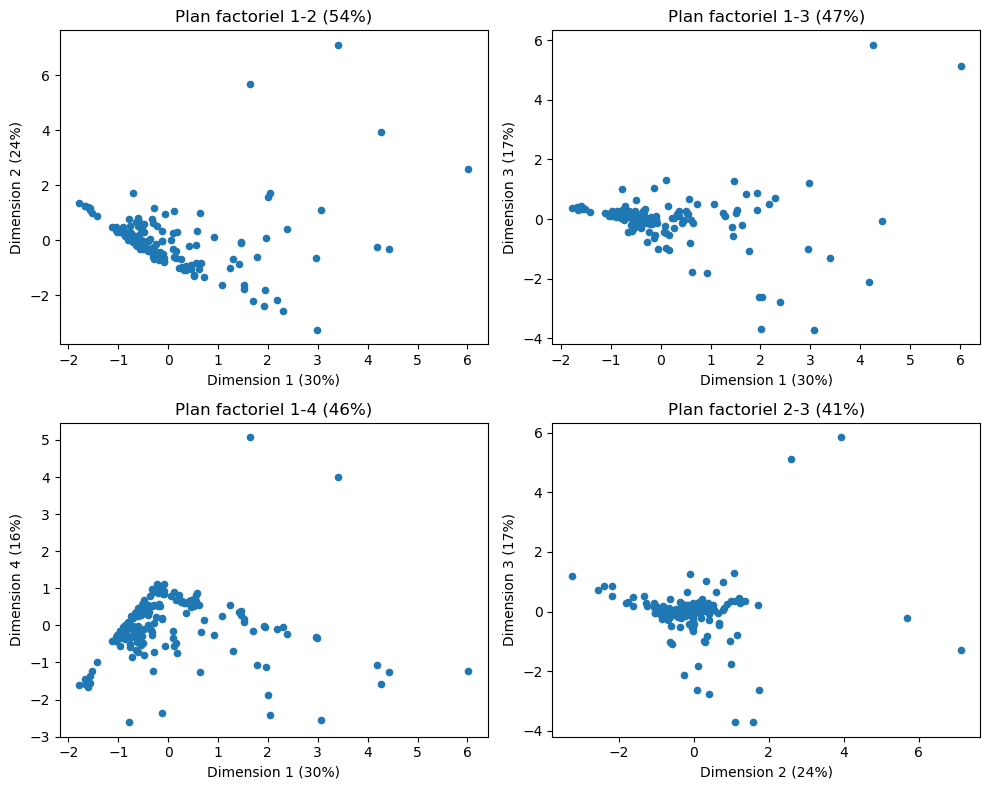

In [153]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Affichage du nuage de points pour chaque paire de dimensions
std_pca_df.plot.scatter("Dim1", "Dim2", ax=axes[0, 0])
axes[0, 0].set_xlabel("Dimension 1 (30%)")
axes[0, 0].set_ylabel("Dimension 2 (24%)")
axes[0, 0].set_title("Plan factoriel 1-2 (54%)")

std_pca_df.plot.scatter("Dim1", "Dim3", ax=axes[0, 1])
axes[0, 1].set_xlabel("Dimension 1 (30%)")
axes[0, 1].set_ylabel("Dimension 3 (17%)")
axes[0, 1].set_title("Plan factoriel 1-3 (47%)")

std_pca_df.plot.scatter("Dim1", "Dim4", ax=axes[1, 0])
axes[1, 0].set_xlabel("Dimension 1 (30%)")
axes[1, 0].set_ylabel("Dimension 4 (16%)")
axes[1, 0].set_title("Plan factoriel 1-4 (46%)")

std_pca_df.plot.scatter("Dim2", "Dim3", ax=axes[1, 1])
axes[1, 1].set_xlabel("Dimension 2 (24%)")
axes[1, 1].set_ylabel("Dimension 3 (17%)")
axes[1, 1].set_title("Plan factoriel 2-3 (41%)")

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez la figure
plt.show()

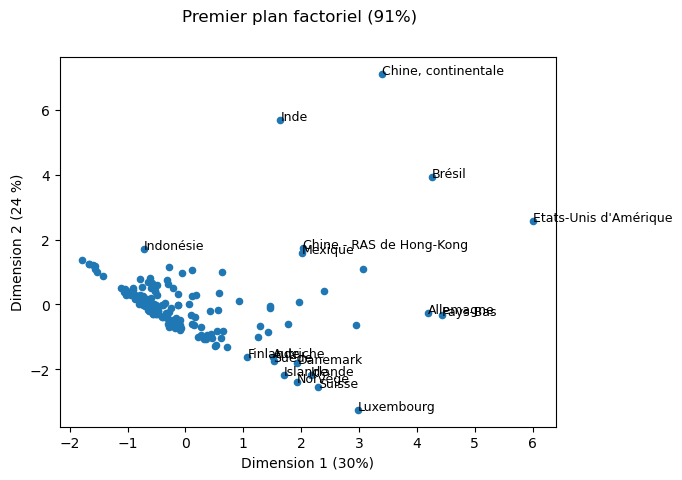

In [157]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
std_pca_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in std_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 3.5) | (abs(k[1]['Dim2']) > 1.5):
        ax.annotate(k[1]["Country"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1 (30%)") 
plt.ylabel("Dimension 2 (24 %)")
plt.suptitle("Premier plan factoriel (91%)")
plt.show()

In [144]:
def display_circles(pcs, n_comp, pca, axis_ranks, label=None, label_rotation=0)
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            fig, ax = plt.subplots(figsize(10,10))

            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else : 
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d1,:]), max(pcs[d1,:])
                    

SyntaxError: expected ':' (2915046195.py, line 1)

# Clustering avec k-means

In [ ]:
cluster_range = [2,3,4,5,6,7,8]

inertie = []

for c in cluster_range:
    kmeans=KMeans(init='k-means++', n_clusters=c).fit(std_df)
    inertie.append(kmeans.inertia_)

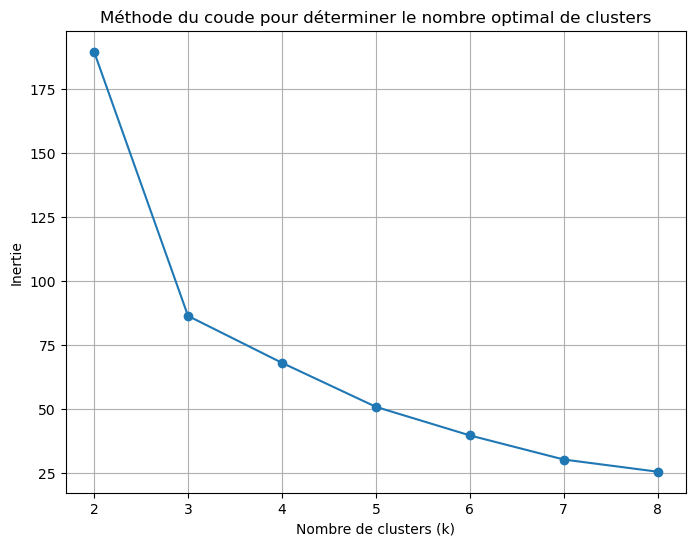

In [ ]:
#représentation avec méthode du coude et choix du nb de clusters

plt.figure(figsize=(8,6))
plt.plot(cluster_range, inertie, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.grid(True)
plt.show()

In [ ]:
#instance du modèle
#affichage de la table avec la nouvelle colonne labels

kmeans = KMeans(n_clusters=3).fit(std_df)
labels = kmeans.labels_
dfa_v2 = pd.DataFrame(data=std_df, columns=["PIB (US$)/hab", "Importations - Quantité(Tonnes)"])
dfa_v2['labels_kmeans']=labels

dfa_v2

,PIB (US$)/hab,Importations - Quantité(Tonnes),labels_kmeans
0,-0.587592,-0.321067,0
1,-0.279145,2.296542,2
2,-0.367116,-0.272492,0
3,-0.390186,-0.466789,0
4,1.832729,4.066801,2
...,...,...,...
167,1.617921,1.859374,2
168,-0.274636,-0.477583,0
169,2.685222,0.186264,1
170,-0.573926,-0.472186,0


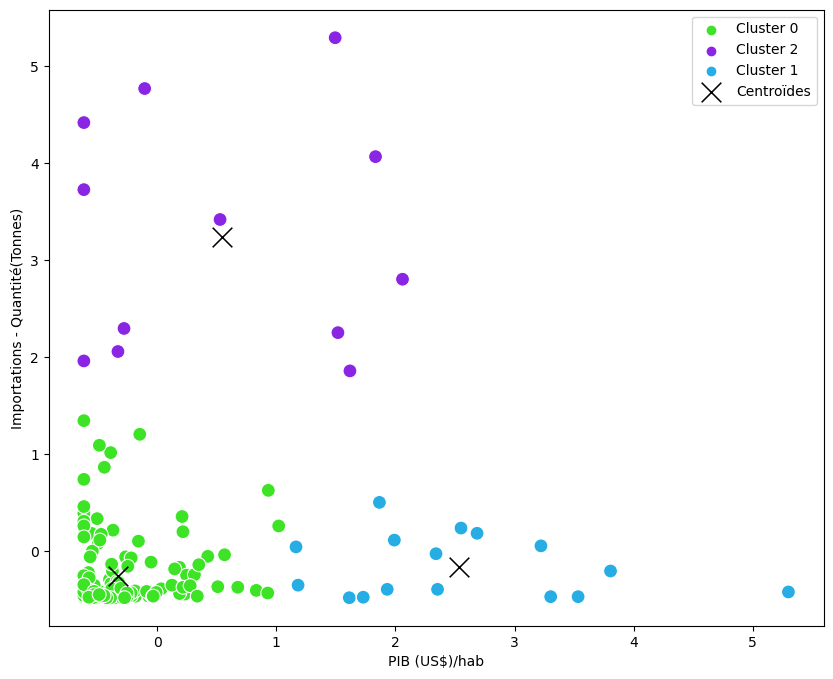

In [ ]:
#Visualiser clusters

cluster_data = dfa_v2.copy()
cluster_data['Cluster'] = cluster_data['labels_kmeans'].apply(lambda x: f'Cluster {x}')

cluster_colors = ['#3CE425', '#8A25E4', '#25ADE4']

plt.figure(figsize=(10, 8))
sns.scatterplot(data=cluster_data, x='PIB (US$)/hab', y='Importations - Quantité(Tonnes)', hue='Cluster', palette=cluster_colors, s=100, style='Cluster', markers='o')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='black', marker='x', s=200, label='Centroïdes')

plt.xlabel('PIB (US$)/hab')
plt.ylabel('Importations - Quantité(Tonnes)')
plt.legend(title='')
plt.show()


In [ ]:
#on créé une nouvelle colonne dans le df principal pour avoir l'information des clusters

df_final['Cluster_kmeans'] = dfa_v2['labels_kmeans']

In [ ]:
#analyse des moyennes des variables des 3 clusters identifiés

cluster_summary = df_final.groupby('Cluster_kmeans')[['PIB (US$)/hab', 'Importations - Quantité(Tonnes)']].mean()
print(cluster_summary)

                PIB (US$)/hab  Importations - Quantité(Tonnes)
Cluster_kmeans                                                
0                 5265.024421                     41631.944444
1                57340.597105                     59437.500000
2                21041.656774                    689500.000000


In [ ]:
#0 = Bas PIB et faibles importations
#1 = Trés haut PIB et moyennes importations
#2 = PIB moyen et très fortes importations

renom_cluster_k = {0:"Peu pertinent",
                   1:"Pertinent",
                   2:"Trés pertinent"
                   }

df_final['Cluster_kmeans'] = df_final['Cluster_kmeans'].map(renom_cluster_k)

In [ ]:
df_final[df_final['Cluster_kmeans']=="Trés pertinent"].head(6)

,ISO,Pays,Continent,Capitale,Population,PIB (US$)/hab,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure(Tonnes),Exportations - Quantité(Tonnes),Importations - Quantité(Tonnes),Nourriture(Tonnes),Production(Tonnes),Distance avec FRA(km),Latitude,Longitude,Cluster_kmeans
1,ZAF,Afrique du Sud,Africa,Le Cap,5.700976e+07,6131.479450,143.0,35.69,2118000.0,63000.0,514000.0,2035000.0,1667000.0,9353.552000,-33.93333,18.466670,Trés pertinent
4,DEU,Allemagne,Europe,Essen,8.265841e+07,44552.819372,71.0,19.47,1739000.0,646000.0,842000.0,1609000.0,1514000.0,439.898400,51.46700,6.983000,Trés pertinent
7,SAU,Arabie saoudite,Asia,Riyad,3.310118e+07,20803.745918,151.0,43.36,1435000.0,10000.0,722000.0,1435000.0,616000.0,4694.500000,24.65000,46.766670,Trés pertinent
31,HKG,Chine - RAS de Hong-Kong,Asia,Hong Kong,7.306322e+06,0.000000,210.0,53.51,280000.0,663000.0,907000.0,391000.0,24000.0,9628.912906,22.30000,114.158700,Trés pertinent
34,CHN,"Chine, continentale",Asia,Pékin,1.421022e+09,0.000000,59.0,12.33,18161000.0,576000.0,452000.0,17518000.0,18236000.0,8216.986967,35.86170,116.407400,Trés pertinent
51,FRA,France,Europe,Paris,6.484251e+07,38812.161034,92.0,22.90,1573000.0,501000.0,506000.0,1485000.0,1750000.0,278.187600,48.86666,2.333333,Trés pertinent


# Classification ascendante hiérarchique (CAH)

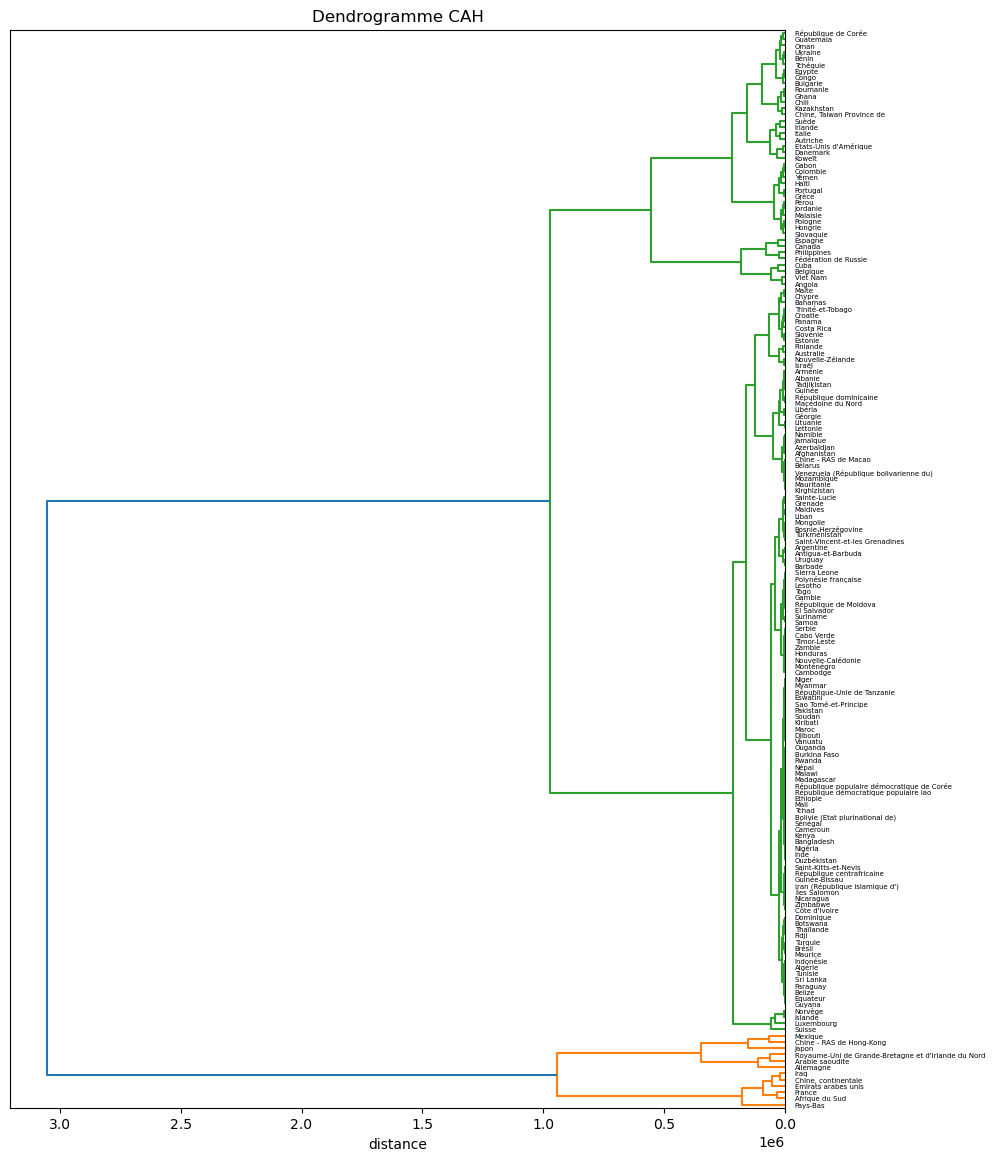

In [ ]:
#générer le dendrogramme pour déterminer clusters

linkage_matrix = linkage(dfa, method='ward', metric='euclidean')

# Affichage du dendrogramme
plt.figure(figsize=(10,14))
dendrogram(linkage_matrix, orientation='left', labels=df_final['Pays'].values)
plt.xlabel("distance")

plt.title("Dendrogramme CAH")
plt.show()

# Attribution des étiquettes de cluster
clusters = fcluster(linkage_matrix, t=1.5, criterion='distance')

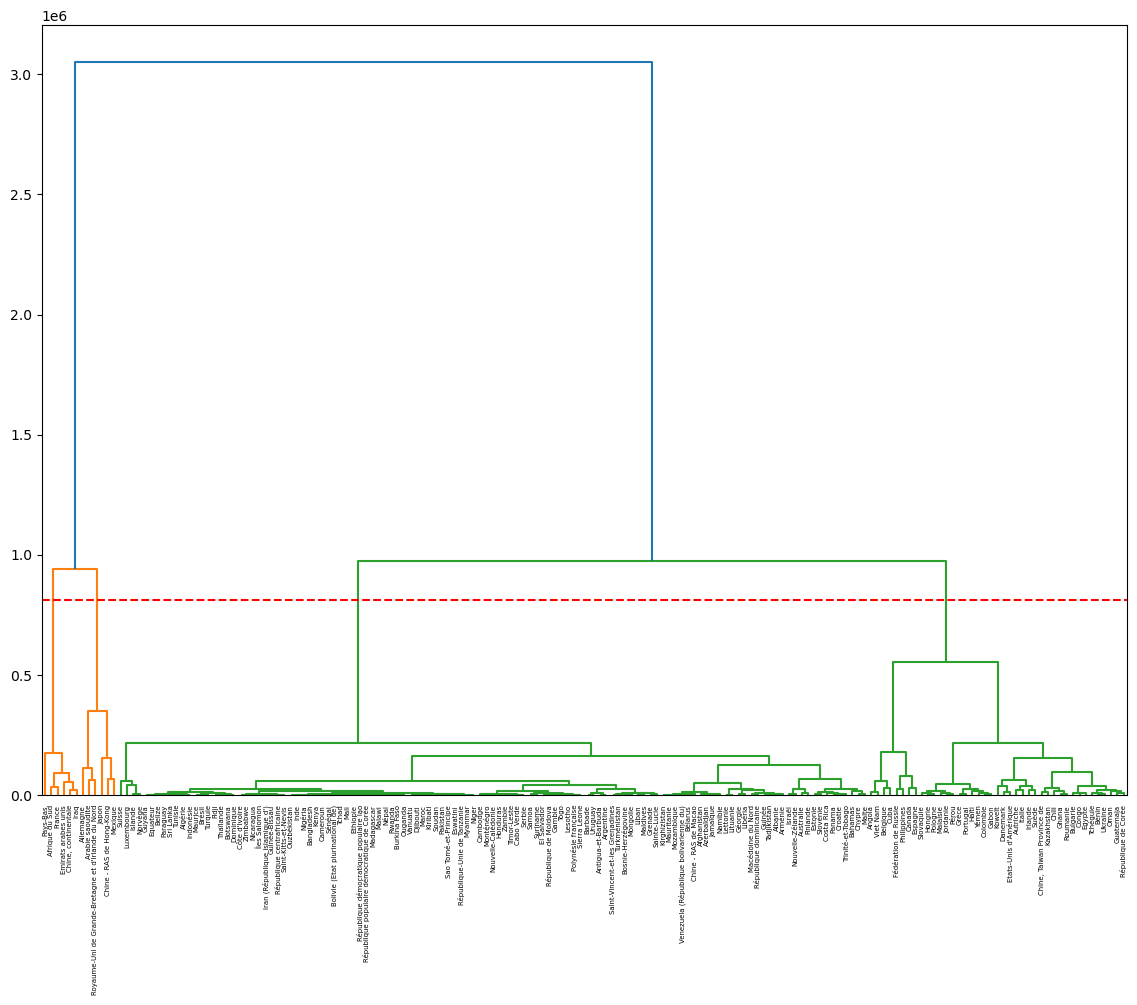

In [ ]:
#tracer droite pour clusters

X = dfa.values

plt.figure(figsize=(14,10))
dendogram = sch.dendrogram(sch.linkage(X, method='ward'), labels=df_final['Pays'].values)
plt.axhline(y=0.81e6, color='r', linestyle='--')
plt.show()

In [ ]:
#instance du modèle

agg_clustering = AgglomerativeClustering(n_clusters=3)

agg_clustering.fit(dfa)

AgglomerativeClustering(n_clusters=3)

In [ ]:
dfa['Cluster_CAH'] = agg_clustering.labels_

In [ ]:
dfa.head(6)

,PIB (US$)/hab,Importations - Quantité(Tonnes),Cluster_CAH
0,519.884773,29000.0,2
1,6131.479450,514000.0,0
2,4531.020806,38000.0,2
3,4111.294110,2000.0,2
4,44552.819372,842000.0,0
5,4095.812942,277000.0,1


In [ ]:
#comprendre la caractérisation des clusters 

dfa.groupby(['Cluster_CAH']).mean()

,PIB (US$)/hab,Importations - Quantité(Tonnes)
Cluster_CAH,,
0,21041.656774,689500.000000
1,15102.168083,135951.219512
2,8877.514108,11529.411765


In [ ]:
df_final = pd.concat([df_final, dfa['Cluster_CAH']], axis=1)

df_final

,ISO,Pays,Continent,Capitale,Population,PIB (US$)/hab,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure(Tonnes),Exportations - Quantité(Tonnes),Importations - Quantité(Tonnes),Nourriture(Tonnes),Production(Tonnes),Distance avec FRA(km),Latitude,Longitude,Cluster_kmeans,Cluster_CAH
0,AFG,Afghanistan,Asia,Kaboul,36296113.0,519.884773,5.0,1.53,57000.0,0.0,29000.0,55000.0,28000.0,5590.3810,34.516670,69.20000,0,2
1,ZAF,Afrique du Sud,Africa,Le Cap,57009756.0,6131.479450,143.0,35.69,2118000.0,63000.0,514000.0,2035000.0,1667000.0,9353.5520,-33.933330,18.46667,1,0
2,ALB,Albanie,Europe,Tirana,2884169.0,4531.020806,85.0,16.36,47000.0,0.0,38000.0,47000.0,13000.0,1603.5340,41.333330,19.81667,0,2
3,DZA,Algérie,Africa,Alger,41389189.0,4111.294110,22.0,6.38,277000.0,0.0,2000.0,264000.0,275000.0,1340.3900,36.833330,3.00000,0,2
4,DEU,Allemagne,Europe,Essen,82658409.0,44552.819372,71.0,19.47,1739000.0,646000.0,842000.0,1609000.0,1514000.0,439.8984,51.467000,6.98300,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,ARE,Emirats arabes unis,Asia,Abou Dhabi,9487203.0,40644.804043,147.0,43.47,412000.0,94000.0,433000.0,412000.0,48000.0,5249.5350,24.466670,54.41667,1,0
168,ECU,Equateur,America,Quito,16785361.0,6213.501276,83.0,19.31,341000.0,0.0,0.0,324000.0,340000.0,9367.0980,-0.233333,-78.50000,0,2
169,USA,Etats-Unis d'Amérique,America,Washington,325084756.0,60062.222313,219.0,55.68,18266000.0,3692000.0,123000.0,18100000.0,21914000.0,5838.1570,38.867000,-77.00000,2,1
170,ETH,Ethiopie,Africa,Addis Abeba,106399924.0,768.522308,0.0,0.13,14000.0,0.0,1000.0,14000.0,14000.0,5582.5020,9.050000,38.83333,0,2


In [ ]:
df_final[df_final['Cluster_CAH']==2].head(10)

,ISO,Pays,Continent,Capitale,Population,PIB (US$)/hab,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure(Tonnes),Exportations - Quantité(Tonnes),Importations - Quantité(Tonnes),Nourriture(Tonnes),Production(Tonnes),Distance avec FRA(km),Latitude,Longitude,Cluster_kmeans,Cluster_CAH
0,AFG,Afghanistan,Asia,Kaboul,36296113.0,519.884773,5.0,1.53,57000.0,0.0,29000.0,55000.0,28000.0,5590.381,34.51667,69.20000,0,2
2,ALB,Albanie,Europe,Tirana,2884169.0,4531.020806,85.0,16.36,47000.0,0.0,38000.0,47000.0,13000.0,1603.534,41.33333,19.81667,0,2
3,DZA,Algérie,Africa,Alger,41389189.0,4111.294110,22.0,6.38,277000.0,0.0,2000.0,264000.0,275000.0,1340.390,36.83333,3.00000,0,2
6,ATG,Antigua-et-Barbuda,America,Saint John's,95426.0,15383.415188,233.0,54.10,7000.0,0.0,7000.0,5000.0,0.0,6708.770,17.13333,-61.83333,0,2
8,ARG,Argentine,America,Buenos Aires,43937140.0,14613.041825,182.0,42.24,1962000.0,207000.0,8000.0,1856000.0,2161000.0,11072.250,-34.66667,-58.50000,0,2
9,ARM,Arménie,Asia,Erevan,2944791.0,3914.501268,54.0,16.06,47000.0,0.0,35000.0,47000.0,11000.0,3434.071,40.18333,44.50000,0,2
10,AUS,Australie,Pacific,Canberra,24584620.0,54027.966818,192.0,47.65,1171000.0,42000.0,16000.0,1171000.0,1269000.0,16975.460,-35.30000,149.13300,2,2
12,AZE,Azerbaïdjan,Asia,Bakou,9845320.0,4147.089716,44.0,13.11,129000.0,0.0,27000.0,129000.0,104000.0,3817.547,40.36666,49.88334,0,2
13,BHS,Bahamas,America,Nassau,381755.0,32718.638101,182.0,43.17,26000.0,0.0,24000.0,16000.0,6000.0,7209.450,25.08333,-77.33334,2,2
14,BGD,Bangladesh,Asia,Dacca,159685424.0,1563.913699,7.0,1.50,250000.0,0.0,0.0,240000.0,249000.0,7916.790,23.70000,90.36667,0,2


# Comparaison des clusters k-means & CAH 